In [66]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.base import clone
import seaborn as sns
import matplotlib.pyplot as plt
import gpplot as gpp

In [67]:
cleaned_data = pd.read_csv('../../Data/cleanedData/CombinedCleanedDatasets.csv')
cleaned_data

,Target Gene Symbol,chromosome,sgRNA Sequence,sgRNA Context Sequence,sgRNA 'Cut' Position,Strand of Target,Strand of sgRNA,TSS Position,sgRNA 'Cut' Site TSS Offset,Phenotype scores-ave_Rep1_Rep2,...,condition,Domain,DataSet,zscoreRelativeNC_signed,Avg_LFC_signed,z_scored_avg_lfc,rs3ChenSeqScore,cellDomainDataSet,z_score,signed_zscore
0,LARS2,chr3,AAAAAAAAAACAGGACACAG,CAGAAAAAAAAAAACAGGACACAGGGGAGA,45389244.0,+,-,45388577.0,667.0,NaN,...,A549,Kox1,InHouse,NaN,NaN,-0.398339,0.013999,A549_Kox1_InHouse,-0.398339,0.398339
1,LARS2,chr3,AAAAAAAAAACAGGACACAG,CAGAAAAAAAAAAACAGGACACAGGGGAGA,45389244.0,+,-,45388577.0,667.0,NaN,...,A549,Zim3,InHouse,NaN,NaN,-0.841793,0.013999,A549_Zim3_InHouse,-0.841793,0.841793
2,LARS2,chr3,AAAAAAAAAACAGGACACAG,CAGAAAAAAAAAAACAGGACACAGGGGAGA,45389244.0,+,-,45388577.0,667.0,NaN,...,HCT116,Zim3,InHouse,NaN,NaN,-0.992358,0.013999,HCT116_Zim3_InHouse,-0.992358,0.992358
3,COQ2,chr4,AAAAAAAAAAGGGCACCAAG,ATAAAAAAAAAAAAGGGCACCAAGTGGCCA,83285687.0,-,+,83284798.0,-888.0,NaN,...,A549,Kox1,InHouse,NaN,NaN,0.044728,-0.401549,A549_Kox1_InHouse,0.044728,-0.044728
4,COQ2,chr4,AAAAAAAAAAGGGCACCAAG,ATAAAAAAAAAAAAGGGCACCAAGTGGCCA,83285687.0,-,+,83284798.0,-888.0,NaN,...,A549,Zim3,InHouse,NaN,NaN,-0.190308,-0.401549,A549_Zim3_InHouse,-0.190308,0.190308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257411,WDR11,chr10,gctaggacctctactacaatgaa,GGCTAGGACCTCTACTACAATGAATGGGAG,120855890.0,+,+,120851363.0,4527.0,NaN,...,K562,Kox1,Gilbert,0.387317,0.354061,NaN,0.382810,K562_Kox1_Gilbert,0.387317,0.387317
257412,WDR11,chr10,gctaggacctctactacaatgaat,GCTAGGACCTCTACTACAATGAATGGGAGA,120855891.0,+,+,120851363.0,4528.0,NaN,...,K562,Kox1,Gilbert,-0.782858,-0.048063,NaN,0.654478,K562_Kox1_Gilbert,-0.782858,-0.782858
257413,WDR11,chr10,gtctttcatcaagtctgatgta,CAGTCTTTCATCAAGTCTGATGTAAGGTAT,120855971.0,+,+,120851363.0,4608.0,NaN,...,K562,Kox1,Gilbert,1.429277,0.712125,NaN,0.076554,K562_Kox1_Gilbert,1.429277,1.429277
257414,WDR11,chr10,gtaggtccaagtttcagtc,TTTATGTAGGTCCAAGTTTCAGTCTGGTAT,120856094.0,+,+,120851363.0,4731.0,NaN,...,K562,Kox1,Gilbert,0.553328,0.411110,NaN,0.717680,K562_Kox1_Gilbert,0.553328,0.553328


In [68]:
#normalize for gene essentiality by z-scoring guide z-scores within the gene targeted and dataset
zscore_scaler = preprocessing.StandardScaler()
cleaned_data['doubleZscore'] = cleaned_data.groupby(['Target Gene Symbol','cellDomainDataSet'])['signed_zscore'].transform(lambda x: clone(zscore_scaler).fit_transform(x.to_frame())[:, 0])

/var/folders/mj/lhpd16ys0cx2wkbhm7s0nfcm0000gp/T/ipykernel_61031/1506836799.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


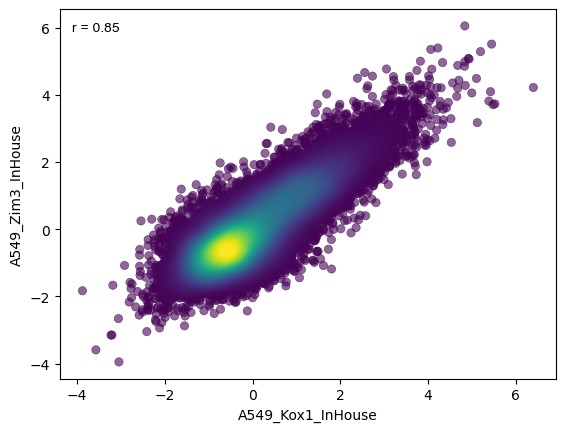

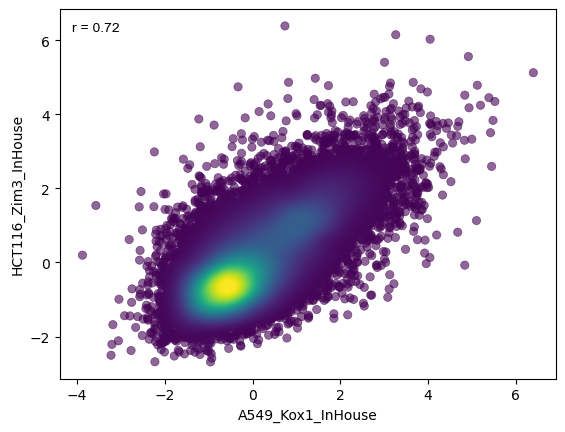

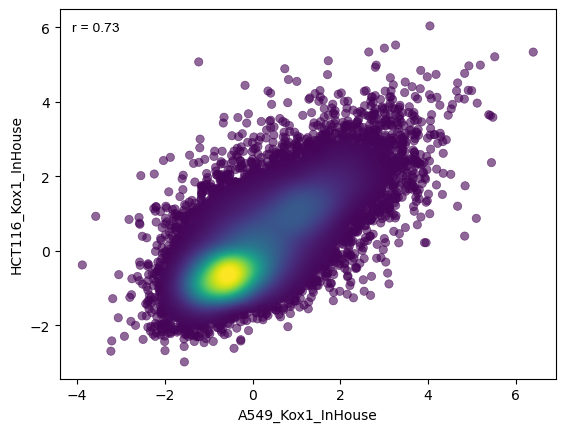

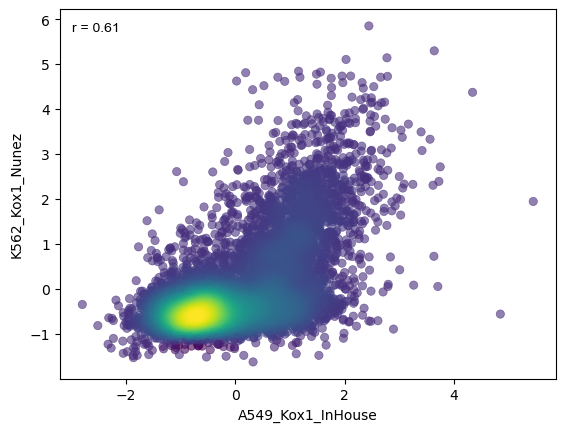

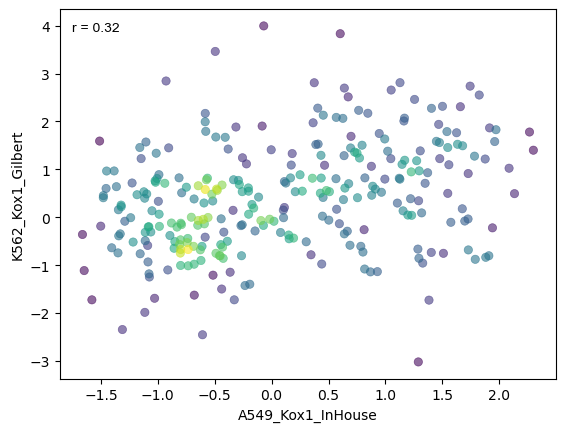

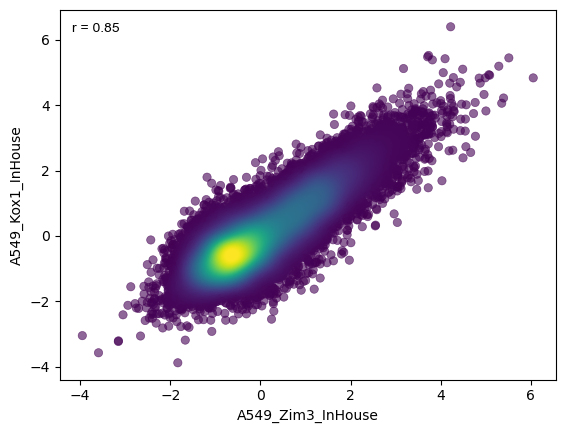

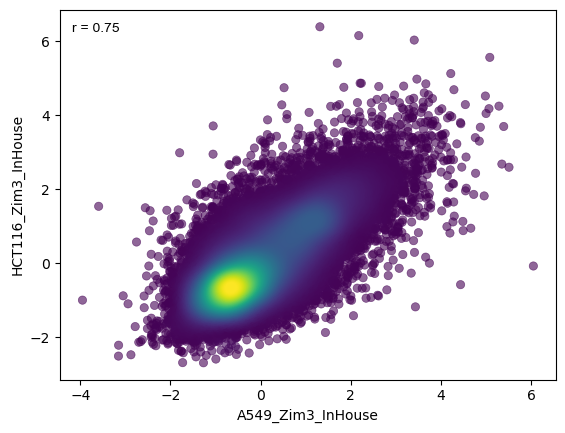

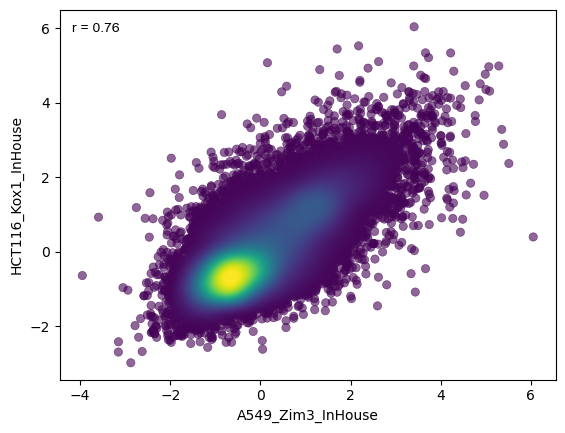

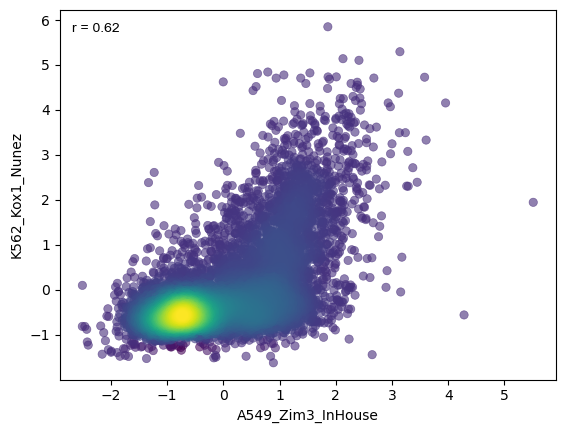

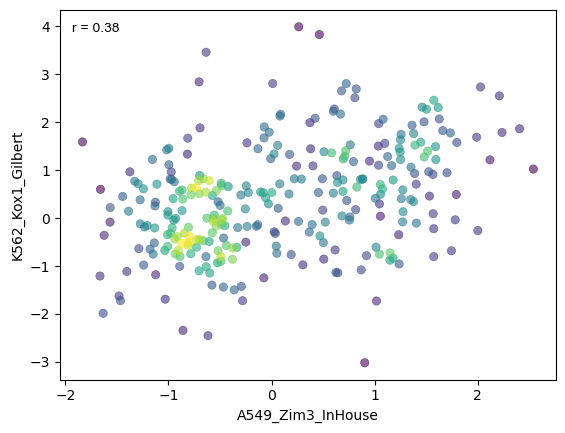

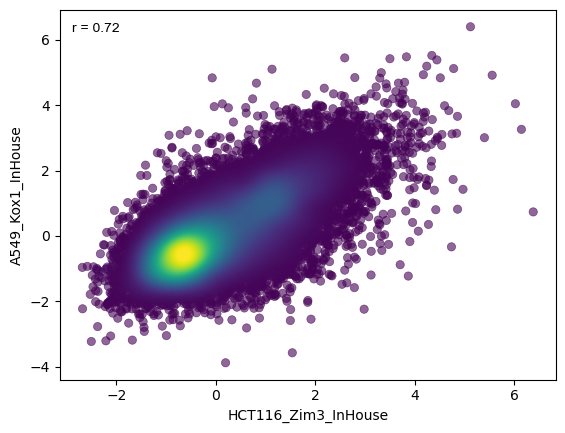

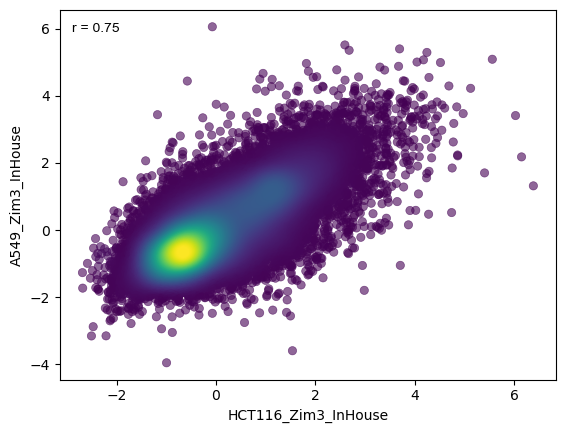

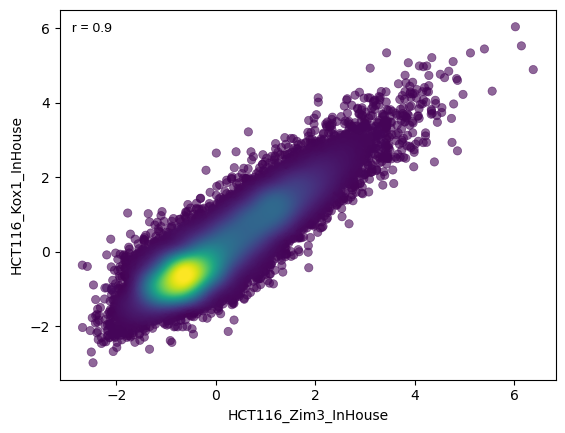

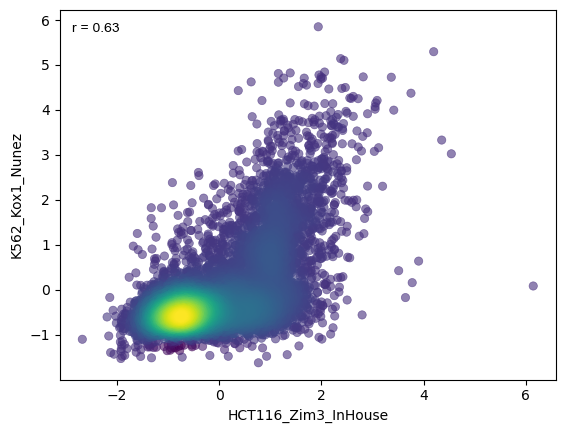

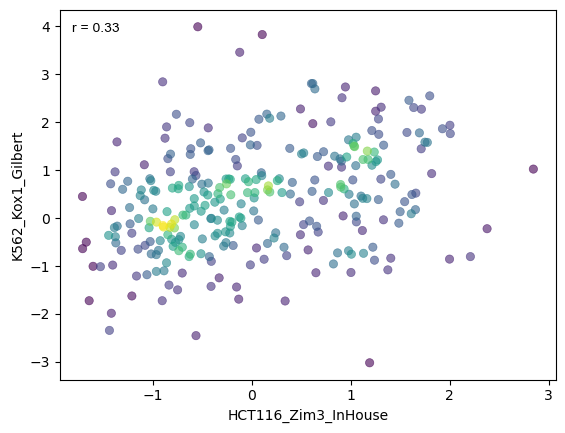

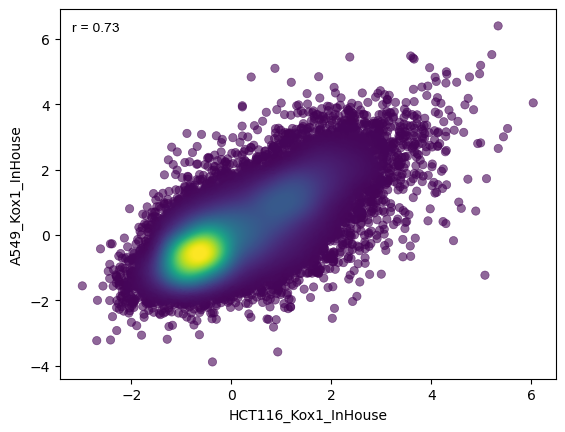

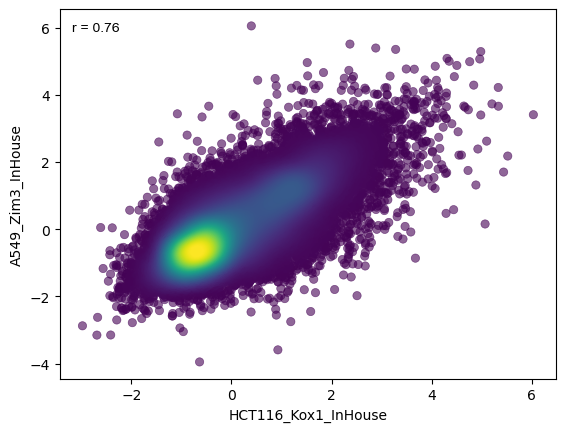

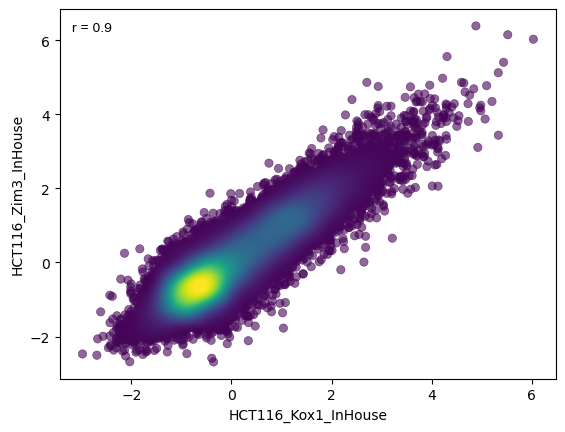

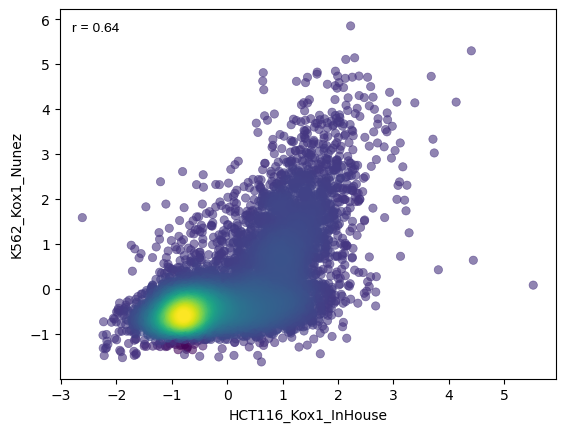

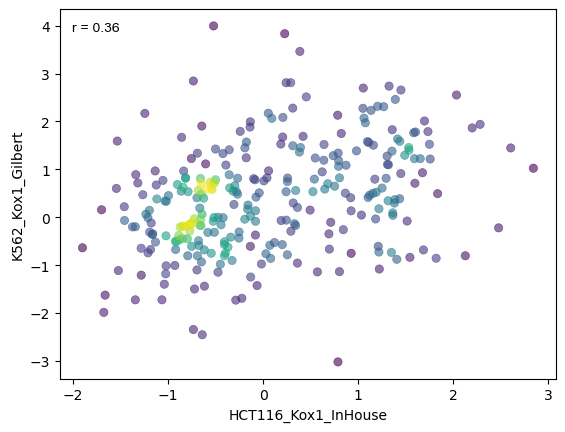

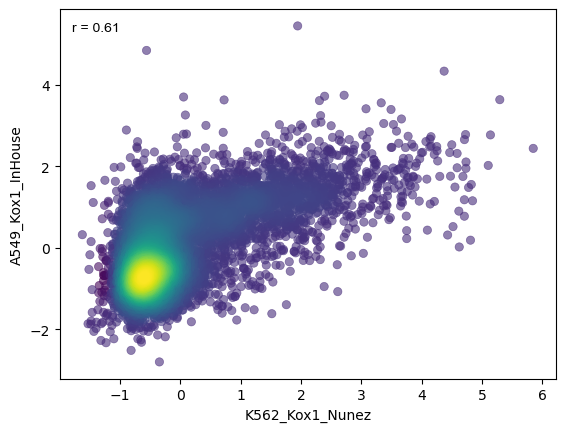

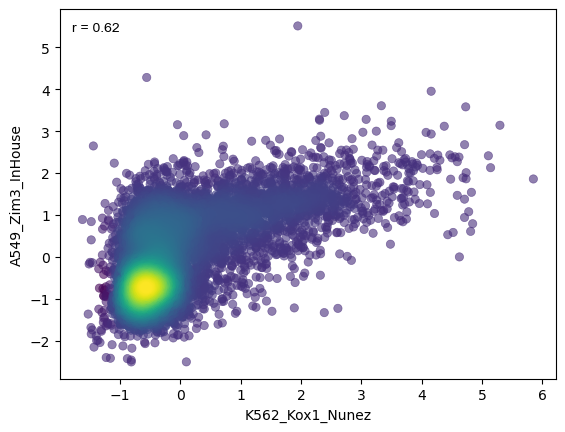

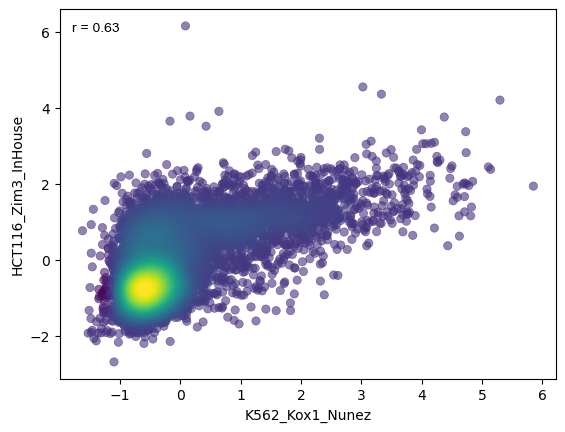

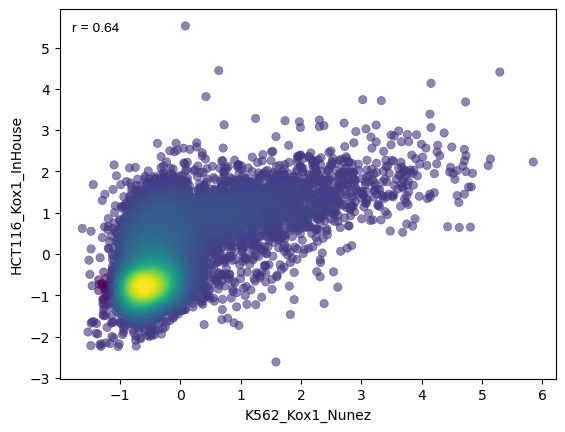

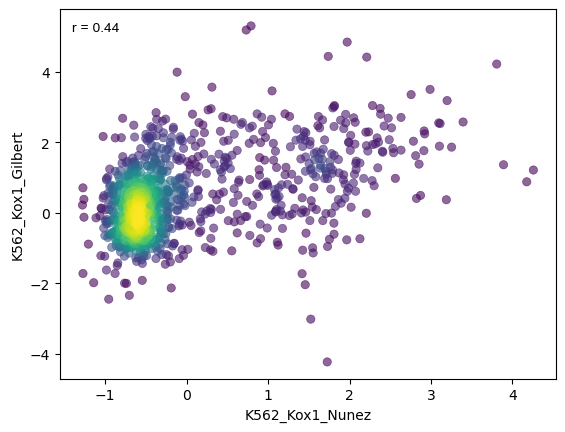

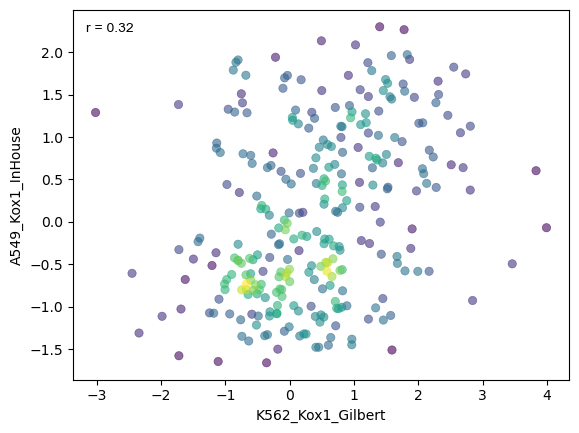

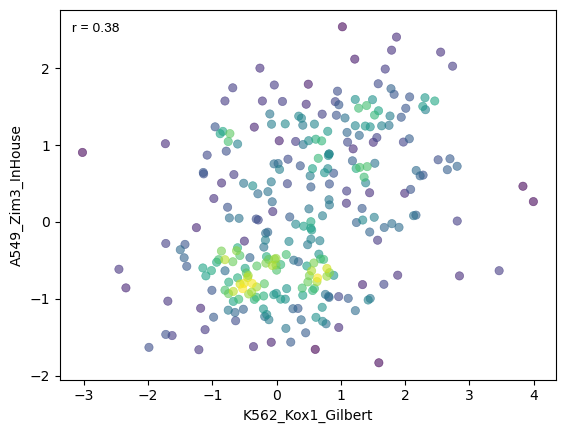

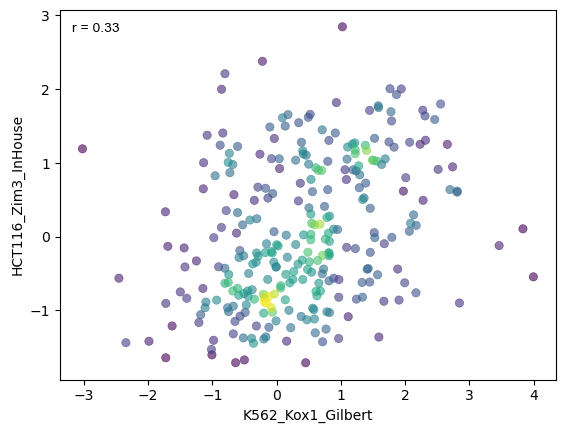

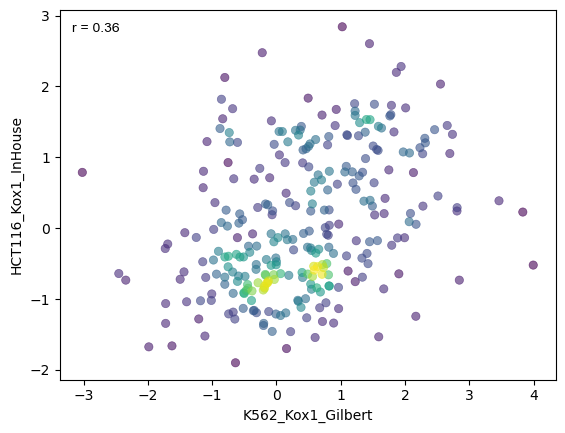

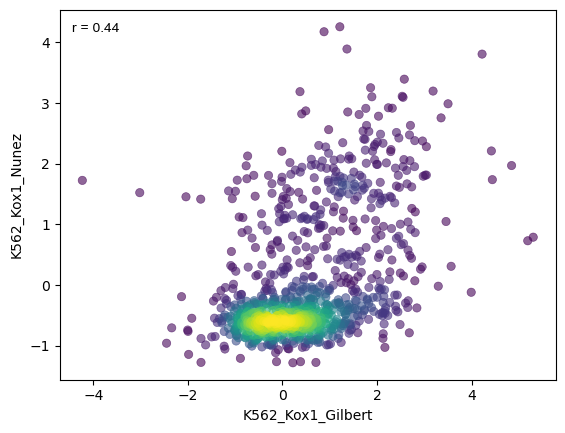

In [69]:
#confirm that guides shared between multiple datasets have positively correlated z-scores
transformed_pivoted = cleaned_data.pivot(index = ['sgRNA Context Sequence','Target Gene Symbol'],
                                         columns = 'cellDomainDataSet', values = 'doubleZscore').reset_index()
for screen1 in cleaned_data['cellDomainDataSet'].unique():
    for screen2 in cleaned_data['cellDomainDataSet'].unique():
        if screen1 != screen2:
            plot_df = transformed_pivoted[[screen1,screen2]].dropna()
            plt.figure()
            gpp.point_densityplot(data = plot_df, x = screen1, y = screen2)
            gpp.add_correlation(data = plot_df, x = screen1, y = screen2)

In [70]:
#average z-scores for same guide screened with same domain
cleaned_data_average_zz = cleaned_data.groupby(['Target Gene Symbol', 'sgRNA Context Sequence', 'Domain', 'Strand of Target',
                                                'Strand of sgRNA', 'chromosome', 'sgRNA \'Cut\' Position', 'TSS Position',
                                                'sgRNA \'Cut\' Site TSS Offset','rs3ChenSeqScore'])['doubleZscore'].mean().reset_index()
cleaned_data_average_zz

,Target Gene Symbol,sgRNA Context Sequence,Domain,Strand of Target,Strand of sgRNA,chromosome,sgRNA 'Cut' Position,TSS Position,sgRNA 'Cut' Site TSS Offset,rs3ChenSeqScore,doubleZscore
0,AATF,AAAACTAAGTTGGAGACTGATGGAAGGATT,Kox1,+,+,chr17,36949636.0,36948955.0,681.0,0.517537,-0.162900
1,AATF,AAAACTAAGTTGGAGACTGATGGAAGGATT,Zim3,+,+,chr17,36949636.0,36948955.0,681.0,0.517537,-0.335930
2,AATF,AAACTTGGTGCTCGGCTGGATGGGCGGAAC,Kox1,+,+,chr17,36949430.0,36948955.0,475.0,0.011229,0.343028
3,AATF,AAACTTGGTGCTCGGCTGGATGGGCGGAAC,Zim3,+,+,chr17,36949430.0,36948955.0,475.0,0.011229,0.487013
4,AATF,AAAGAAGCCGAAGCCCTCCTCCCGAGGCCG,Kox1,+,-,chr17,36949375.0,36948955.0,420.0,0.316988,1.403622
...,...,...,...,...,...,...,...,...,...,...,...
164756,ZNHIT6,TTTAATGGTTAACACAGATTAGGGTGGGTT,Kox1,-,-,chr1,85708727.0,85708433.0,-293.0,0.611774,-0.458460
164757,ZNHIT6,TTTACGGCTCTGCGGAGGCCCTGCCGGATT,Kox1,-,+,chr1,85708514.0,85708433.0,-80.0,-0.431003,-0.478862
164758,ZNHIT6,TTTAGTGGTAAAAGAAGCGAAGGTGGGTGA,Kox1,-,-,chr1,85707893.0,85708433.0,541.0,0.557163,-0.386223
164759,ZNHIT6,TTTCTGGAGTCAGACGGCGTTCGCGGGGGT,Kox1,-,-,chr1,85707491.0,85708433.0,943.0,-0.492183,-0.296669


In [78]:
#read in chromatin accessibility data
DHS_combined = pd.read_csv('../../Data/DHS/combinedDatasetsDHSOverlap.csv')
ATAC_combined = pd.read_csv('../../Data/ATAC-seq/combinedDatasetsATACseqOverlap.csv')
ChIP_combined = pd.read_csv('../../Data/ChIP-seq/combinedDatasetsChIPseqOverlap.csv')

In [79]:
#calculate proportions of guides in peaks to use as input feature
DHS_combined = DHS_combined[['chromosome','sgRNA Context Sequence','Strand of sgRNA',
                             'sgRNA \'Cut\' Position','DHS','overlap with peak']].drop_duplicates()
DHS_agg = DHS_combined.groupby(['sgRNA Context Sequence',
                                'chromosome',
                                'Strand of sgRNA',
                                'sgRNA \'Cut\' Position'])['overlap with peak'].mean().reset_index().rename(columns = {"overlap with peak":"DHS overlap with peak sum"})

ATAC_combined = ATAC_combined[['chromosome','sgRNA Context Sequence','Strand of sgRNA',
                               'sgRNA \'Cut\' Position','ATACseq','overlap with peak']].drop_duplicates()
ATAC_agg = ATAC_combined.groupby(['sgRNA Context Sequence',
                                'chromosome',
                                'Strand of sgRNA',
                                'sgRNA \'Cut\' Position'])['overlap with peak'].mean().reset_index().rename(columns = {"overlap with peak":"ATAC overlap with peak sum"})
ATAC_agg

,sgRNA Context Sequence,chromosome,Strand of sgRNA,sgRNA 'Cut' Position,ATAC overlap with peak sum
0,AAAAAAAAAAAAAAATTAGTCGTAGGGTGG,chr17,-,38296513.0,0.714286
1,AAAAAAAAAAAAAATTAACGTGCCAGGGGC,chr12,-,69360661.0,0.000000
2,AAAAAAAAAAAAAGCCGTGTGAGCTGGCGG,chr17,+,17280422.0,0.428571
3,AAAAAAAAAAAAAGTGCAAAACGTTGGATA,chr17,+,80991447.0,0.285714
4,AAAAAAAAAAAAATTAACGTGCCAGGGGCT,chr12,-,69360660.0,0.000000
...,...,...,...,...,...
121300,TTTTTTTTTTTCAACATAAAAGAGTGGTAG,chr2,+,216110269.0,0.428571
121301,TTTTTTTTTTTCACTGAGCGCTCTGGGAAT,chr3,-,184174576.0,1.000000
121302,TTTTTTTTTTTTCACTGAGCGCTCTGGGAA,chr3,-,184174577.0,1.000000
121303,TTTTTTTTTTTTCAGGATATGGATTGGGAA,chr17,+,8209867.0,0.857143


In [80]:
#calculate proportions of guides in peaks to use as input feature
ChIP_combined = ChIP_combined[['chromosome','sgRNA Context Sequence','Strand of sgRNA',
                               'sgRNA \'Cut\' Position','ChIPseq','overlap with peak']].drop_duplicates()
pivoted_CHIP = ChIP_combined.pivot_table(index=['chromosome','sgRNA Context Sequence','Strand of sgRNA','sgRNA \'Cut\' Position'], 
                                         columns='ChIPseq', 
                                         values='overlap with peak',
                                         aggfunc='sum',
                                         fill_value=0).reset_index()
pivoted_CHIP['H3K4me3'] = pivoted_CHIP[['H3K4me3_A549','H3K4me3_HCT116','H3K4me3_K562']].mean(axis=1)
pivoted_CHIP['H3k27ac'] = pivoted_CHIP[['H3k27ac_A549','H3k27ac_HCT116','H3k27ac_K562']].mean(axis=1)
pivoted_CHIP = pivoted_CHIP.drop(['H3K4me3_A549','H3K4me3_HCT116','H3K4me3_K562','H3k27ac_A549','H3k27ac_HCT116','H3k27ac_K562'],axis=1)
pivoted_CHIP

ChIPseq,chromosome,sgRNA Context Sequence,Strand of sgRNA,sgRNA 'Cut' Position,H3K4me3,H3k27ac
0,chr1,AAAAAAAAAGAGTTCTGAGGGTATAGGCTA,-,241520319.0,1.000000,0.333333
1,chr1,AAAAAAAATAAGGGATCTTCCAAAAGGAAA,+,156337442.0,1.000000,1.000000
2,chr1,AAAAAAACGTTAAAGAAATTGTAAAGGAGA,+,93879768.0,1.000000,1.000000
3,chr1,AAAAAAAGAGTCTGGAAAAGGAGTAGGTCC,-,28328400.0,1.000000,1.000000
4,chr1,AAAAAAATCACCGAATGCCCCTGCAGGGGT,+,44986975.0,0.666667,0.666667
...,...,...,...,...,...,...
121300,chr9,TTTTTAAAAGAGCGTGTTTCTTCGGGGCTT,-,92293502.0,1.000000,1.000000
121301,chr9,TTTTTACTACTCTGGTAGGAGGGGTGGGGT,-,36257452.0,1.000000,0.666667
121302,chr9,TTTTTCATCTTCCGCGGCGGATCAGGGACT,+,2844156.0,0.666667,0.666667
121303,chr9,TTTTTTCATCTTCCGCGGCGGATCAGGGAC,+,2844155.0,0.666667,0.666667


In [81]:
#merge scaled data with chromatin accessibility overlap datasets
cleaned_data_average_zz_featurized = cleaned_data_average_zz.merge(DHS_agg).merge(ATAC_agg).merge(pivoted_CHIP)
cleaned_data_average_zz_featurized

,Target Gene Symbol,sgRNA Context Sequence,Domain,Strand of Target,Strand of sgRNA,chromosome,sgRNA 'Cut' Position,TSS Position,sgRNA 'Cut' Site TSS Offset,rs3ChenSeqScore,doubleZscore,DHS overlap with peak sum,ATAC overlap with peak sum,H3K4me3,H3k27ac
0,AATF,AAAACTAAGTTGGAGACTGATGGAAGGATT,Kox1,+,+,chr17,36949636.0,36948955.0,681.0,0.517537,-0.162900,0.0,0.285714,1.0,1.000000
1,AATF,AAAACTAAGTTGGAGACTGATGGAAGGATT,Zim3,+,+,chr17,36949636.0,36948955.0,681.0,0.517537,-0.335930,0.0,0.285714,1.0,1.000000
2,AATF,AAACTTGGTGCTCGGCTGGATGGGCGGAAC,Kox1,+,+,chr17,36949430.0,36948955.0,475.0,0.011229,0.343028,0.0,1.000000,1.0,1.000000
3,AATF,AAACTTGGTGCTCGGCTGGATGGGCGGAAC,Zim3,+,+,chr17,36949430.0,36948955.0,475.0,0.011229,0.487013,0.0,1.000000,1.0,1.000000
4,AATF,AAAGAAGCCGAAGCCCTCCTCCCGAGGCCG,Kox1,+,-,chr17,36949375.0,36948955.0,420.0,0.316988,1.403622,0.0,1.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163308,ZNHIT6,TTTAATGGTTAACACAGATTAGGGTGGGTT,Kox1,-,-,chr1,85708727.0,85708433.0,-293.0,0.611774,-0.458460,0.0,1.000000,1.0,1.000000
163309,ZNHIT6,TTTACGGCTCTGCGGAGGCCCTGCCGGATT,Kox1,-,+,chr1,85708514.0,85708433.0,-80.0,-0.431003,-0.478862,1.0,1.000000,1.0,1.000000
163310,ZNHIT6,TTTAGTGGTAAAAGAAGCGAAGGTGGGTGA,Kox1,-,-,chr1,85707893.0,85708433.0,541.0,0.557163,-0.386223,0.0,0.857143,1.0,1.000000
163311,ZNHIT6,TTTCTGGAGTCAGACGGCGTTCGCGGGGGT,Kox1,-,-,chr1,85707491.0,85708433.0,943.0,-0.492183,-0.296669,0.0,0.142857,1.0,0.666667


In [82]:
#create orientation feature
cleaned_data_average_zz_featurized['Orientation'] = cleaned_data_average_zz_featurized['Strand of Target'] + cleaned_data_average_zz_featurized['Strand of sgRNA']

In [83]:
#create binned TSS offset feature

# Create intervals of 25 between -5000 and 5000
interval_25 = list(range(-5000, 5025, 25))


# Create labels based on the new cut_list
labels_5kb = [f'[{interval_25[i]}, {interval_25[i+1]})' for i in range(len(interval_25)-1)]

cleaned_data_average_zz_featurized['TSS Bucket (-5kb to 5kb)'] = pd.cut(cleaned_data_average_zz_featurized['sgRNA \'Cut\' Site TSS Offset'], 
                                         interval_25[:-1], labels=labels_5kb[:-1], right=False)

cleaned_data_average_zz_featurized['TSS Bucket (-5kb to 5kb)'] = np.where(
    cleaned_data_average_zz_featurized['sgRNA \'Cut\' Site TSS Offset'] >= interval_25[-2],
    pd.cut(cleaned_data_average_zz_featurized['sgRNA \'Cut\' Site TSS Offset'], 
           bins=interval_25[-2:], labels=[labels_5kb[-1]], right=True),
    cleaned_data_average_zz_featurized['TSS Bucket (-5kb to 5kb)']
)
cleaned_data_average_zz_featurized

,Target Gene Symbol,sgRNA Context Sequence,Domain,Strand of Target,Strand of sgRNA,chromosome,sgRNA 'Cut' Position,TSS Position,sgRNA 'Cut' Site TSS Offset,rs3ChenSeqScore,doubleZscore,DHS overlap with peak sum,ATAC overlap with peak sum,H3K4me3,H3k27ac,Orientation,TSS Bucket (-5kb to 5kb)
0,AATF,AAAACTAAGTTGGAGACTGATGGAAGGATT,Kox1,+,+,chr17,36949636.0,36948955.0,681.0,0.517537,-0.162900,0.0,0.285714,1.0,1.000000,++,"[675, 700)"
1,AATF,AAAACTAAGTTGGAGACTGATGGAAGGATT,Zim3,+,+,chr17,36949636.0,36948955.0,681.0,0.517537,-0.335930,0.0,0.285714,1.0,1.000000,++,"[675, 700)"
2,AATF,AAACTTGGTGCTCGGCTGGATGGGCGGAAC,Kox1,+,+,chr17,36949430.0,36948955.0,475.0,0.011229,0.343028,0.0,1.000000,1.0,1.000000,++,"[475, 500)"
3,AATF,AAACTTGGTGCTCGGCTGGATGGGCGGAAC,Zim3,+,+,chr17,36949430.0,36948955.0,475.0,0.011229,0.487013,0.0,1.000000,1.0,1.000000,++,"[475, 500)"
4,AATF,AAAGAAGCCGAAGCCCTCCTCCCGAGGCCG,Kox1,+,-,chr17,36949375.0,36948955.0,420.0,0.316988,1.403622,0.0,1.000000,1.0,1.000000,+-,"[400, 425)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163308,ZNHIT6,TTTAATGGTTAACACAGATTAGGGTGGGTT,Kox1,-,-,chr1,85708727.0,85708433.0,-293.0,0.611774,-0.458460,0.0,1.000000,1.0,1.000000,--,"[-300, -275)"
163309,ZNHIT6,TTTACGGCTCTGCGGAGGCCCTGCCGGATT,Kox1,-,+,chr1,85708514.0,85708433.0,-80.0,-0.431003,-0.478862,1.0,1.000000,1.0,1.000000,-+,"[-100, -75)"
163310,ZNHIT6,TTTAGTGGTAAAAGAAGCGAAGGTGGGTGA,Kox1,-,-,chr1,85707893.0,85708433.0,541.0,0.557163,-0.386223,0.0,0.857143,1.0,1.000000,--,"[525, 550)"
163311,ZNHIT6,TTTCTGGAGTCAGACGGCGTTCGCGGGGGT,Kox1,-,-,chr1,85707491.0,85708433.0,943.0,-0.492183,-0.296669,0.0,0.142857,1.0,0.666667,--,"[925, 950)"


In [84]:
#save cleaned featurized scaled data
cleaned_data_average_zz_featurized.to_csv('../../Data/cleanedData/CleanedScaledData.csv',index=False)